# Kadane's Algorithm Interactive Notebook
**Author:** Amirreza Asgharzadeh  |  **GitHub:** [Amirreza938](https://github.com/Amirreza938)

---

This notebook explores the Maximum Subarray Problem using Kadane's Algorithm and Brute Force, with interactive visualizations and explanations.

## Table of Contents
1. Interactive Demo
2. Theory & Intuition
3. Algorithm Implementations
4. Step-by-Step Visualization
5. Edge Cases
6. Comparison Table
7. References

## 1. Interactive Demo

Use the widgets below to input your own array and select the algorithm. Results and visualizations update live!

#  Kadane's Algorithm - Maximum Subarray Problem

## Problem
Given an array of integers, find the contiguous subarray (containing at least one number) with the largest sum and return the sum.

## Example
Input: [-2, 1, -3, 4, -1, 2, 1, -5, 4]  
Output: 6 → [4, -1, 2, 1]



In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

In [2]:
def max_subarray_brute(nums):
    """Brute force O(n^2) solution for maximum subarray sum."""
    max_sum = float('-inf')
    sub = []
    for i in range(len(nums)):
        for j in range(i, len(nums)):
            s = sum(nums[i:j+1])
            if s > max_sum:
                max_sum = s
                sub = nums[i:j+1]
    return max_sum, sub

def kadane_with_subarray(nums):
    """Kadane's O(n) algorithm, returns max sum and subarray."""
    max_sum = current_sum = nums[0]
    start = end = s = 0
    for i in range(1, len(nums)):
        if nums[i] > current_sum + nums[i]:
            current_sum = nums[i]
            s = i
        else:
            current_sum += nums[i]
        if current_sum > max_sum:
            max_sum = current_sum
            start, end = s, i
    return max_sum, nums[start:end+1]

In [3]:
def plot_subarray(arr, sub):
    plt.figure(figsize=(8,4))
    plt.plot(arr, marker='o')
    if sub:
        start = arr.index(sub[0])
        end = start + len(sub) - 1
        plt.axvspan(start, end, color='lightgreen', alpha=0.5)
    plt.title('Maximum Subarray Highlighted')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

In [4]:
def on_interact(array_str, algorithm):
    try:
        arr = [int(x.strip()) for x in array_str.split(',') if x.strip()]
        if not arr:
            print('Please enter at least one integer.')
            return
    except Exception as e:
        print('Invalid input:', e)
        return
    if algorithm == 'Kadane':
        max_sum, sub = kadane_with_subarray(arr)
    else:
        max_sum, sub = max_subarray_brute(arr)
    print(f'Input: {arr}')
    print(f'Maximum Subarray Sum: {max_sum}')
    print(f'Subarray: {sub}')
    plot_subarray(arr, sub)

array_widget = widgets.Text(
    value='-2, 1, -3, 4, -1, 2, 1, -5, 4',
    description='Array:',
    placeholder='Enter comma-separated integers',
    layout=widgets.Layout(width='60%')
)
algorithm_widget = widgets.Dropdown(
    options=['Kadane', 'Brute Force'],
    value='Kadane',
    description='Algorithm:',
    layout=widgets.Layout(width='30%')
)
ui = widgets.HBox([array_widget, algorithm_widget])
out = widgets.Output()

def update_widgets(change=None):
    with out:
        clear_output(wait=True)
        on_interact(array_widget.value, algorithm_widget.value)

array_widget.observe(update_widgets, names='value')
algorithm_widget.observe(update_widgets, names='value')
display(ui, out)
update_widgets()

Output()

## 2. Theory & Intuition

Kadane's Algorithm is a dynamic programming approach to solve the maximum subarray problem in linear time.  
It works by iterating through the array, at each step deciding whether to extend the current subarray or start a new one, based on which choice yields a higher sum.

- If adding the current element increases the sum, extend the subarray.
- If not, start a new subarray at the current element.

This way, the algorithm efficiently finds the maximum sum of any contiguous subarray.

## 3. Algorithm Implementations

In [5]:
# Brute Force
def max_subarray_brute(nums):
    max_sum = float('-inf')
    for i in range(len(nums)):
        for j in range(i, len(nums)):
            s = sum(nums[i:j+1])
            max_sum = max(max_sum, s)
    return max_sum

# Kadane's Algorithm
def kadane(nums):
    max_sum = current_sum = nums[0]
    for num in nums[1:]:
        current_sum = max(num, current_sum + num)
        max_sum = max(max_sum, current_sum)
    return max_sum

In [6]:
arr = [-2, 1, -3, 4, -1, 2, 1, -5, 4]
print("Brute Force:", max_subarray_brute(arr))
print("Kadane:", kadane(arr))

Brute Force: 6
Kadane: 6


## 4. Step-by-Step Visualization

The following cell visualizes Kadane's algorithm step by step, showing how the subarray and sum evolve.

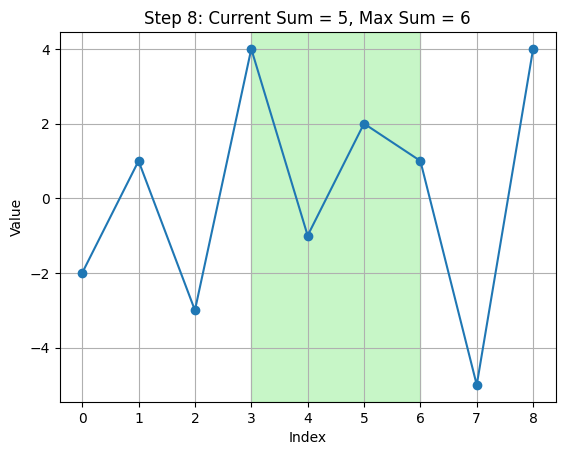

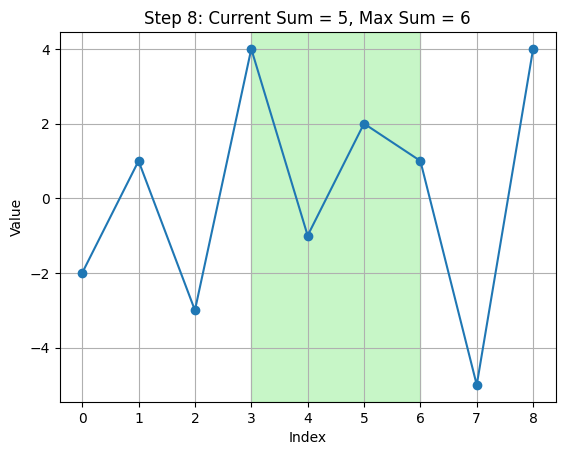

In [7]:
import time

def kadane_step_visual(arr, delay=0.8):
    max_sum = current_sum = arr[0]
    start = end = s = 0
    plt.figure(figsize=(8,4))
    for i in range(1, len(arr)):
        if arr[i] > current_sum + arr[i]:
            current_sum = arr[i]
            s = i
        else:
            current_sum += arr[i]
        if current_sum > max_sum:
            max_sum = current_sum
            start, end = s, i
        plt.clf()
        plt.plot(arr, marker='o')
        plt.axvspan(start, end, color='lightgreen', alpha=0.5)
        plt.title(f'Step {i}: Current Sum = {current_sum}, Max Sum = {max_sum}')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.grid(True)
        display(plt.gcf())
        plt.pause(delay)
        clear_output(wait=True)
    plt.close()

# Run the visualization
kadane_step_visual(arr)

## 5. Edge Cases

Let's see how the algorithm handles special cases:
- All negative numbers
- All positive numbers
- Single element

In [8]:
test_cases = {
    "All Negative": [-8, -3, -6, -2, -5, -4],
    "All Positive": [2, 3, 1, 5],
    "Single Element": [7]
}

for name, case in test_cases.items():
    print(f"{name}: {case}")
    print("Kadane's Result:", kadane_with_subarray(case))
    print()

All Negative: [-8, -3, -6, -2, -5, -4]
Kadane's Result: (-2, [-2])

All Positive: [2, 3, 1, 5]
Kadane's Result: (11, [2, 3, 1, 5])

Single Element: [7]
Kadane's Result: (7, [7])



## 6. Comparison Table

Compare the performance and results of Brute Force and Kadane's Algorithm on various inputs.

In [9]:
import timeit
import pandas as pd

test_arrays = [
    [-2, 1, -3, 4, -1, 2, 1, -5, 4],
    [1, 2, 3, 4, 5, 6, 7, 8, 9],
    [-1, -2, -3, -4, -5],
    [100, -90, 80, -70, 60, -50, 40, -30, 20, -10]
]

results = []
for arr in test_arrays:
    t1 = timeit.timeit(lambda: max_subarray_brute(arr), number=10)
    t2 = timeit.timeit(lambda: kadane(arr), number=10)
    brute = max_subarray_brute(arr)
    kad = kadane(arr)
    results.append({
        "Input": str(arr),
        "Brute Force Result": brute,
        "Kadane Result": kad,
        "Brute Time (ms)": round(t1*100, 2),
        "Kadane Time (ms)": round(t2*100, 2)
    })

df = pd.DataFrame(results)
df

,Input,Brute Force Result,Kadane Result,Brute Time (ms),Kadane Time (ms)
0,"[-2, 1, -3, 4, -1, 2, 1, -5, 4]",6,6,0.06,0.01
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",45,45,0.05,0.01
2,"[-1, -2, -3, -4, -5]",-1,-1,0.02,0.00
3,"[100, -90, 80, -70, 60, -50, 40, -30, 20, -10]",100,100,0.07,0.01


## 7. References

- CLRS Chapter 4: Divide-and-Conquer / Dynamic Programming
- [Kadane's Algorithm - Wikipedia](https://en.wikipedia.org/wiki/Maximum_subarray_problem)
- [LeetCode 53. Maximum Subarray](https://leetcode.com/problems/maximum-subarray/)